# Lecture 7 - Introduction to Machine Learning Paradigms

Machine learning is a vast field that enables computers to learn from data and make predictions or decisions without being explicitly programmed. Broadly, machine learning models can be categorized into three main types based on how they learn from data:

## **1. Supervised Learning**
Supervised learning involves training a model using labeled data, where each input sample is paired with a corresponding output (label). The goal is to learn a mapping function from inputs to outputs so that the model can generalize to unseen data.

- **Examples:** Classification (e.g., spam detection, image recognition), Regression (e.g., predicting house prices).
- **Key Algorithms:** Linear Regression, Decision Trees, Support Vector Machines (SVMs), Neural Networks.

## **2. Unsupervised Learning**
Unsupervised learning deals with unlabeled data, where the model attempts to identify hidden structures or patterns in the data without explicit supervision.

- **Examples:** Clustering (e.g., customer segmentation, anomaly detection), Dimensionality Reduction (e.g., Principal Component Analysis (PCA)).
- **Key Algorithms:** K-Means Clustering, Hierarchical Clustering, Gaussian Mixture Models, Autoencoders.

## **3. Reinforcement Learning**
Reinforcement learning (RL) is a paradigm where an agent learns by interacting with an environment and receiving feedback in the form of rewards or penalties. The agent aims to maximize cumulative rewards over time.

- **Examples:** Game-playing AI (e.g., AlphaGo, Chess engines), Robotics (e.g., self-balancing robots), Autonomous Vehicles.
- **Key Algorithms:** Q-Learning, Deep Q Networks (DQN), Policy Gradient Methods.

Each of these paradigms has unique applications and strengths, and choosing the right approach depends on the problem at hand. In this lecture, we will explore the fundamental concepts, differences, and real-world applications of these learning types.


# Big Example : California Housing Dataset Overview

## **Introduction**
The **California Housing Dataset** is a well-known dataset used for introductory machine learning tasks. It originates from the **1990 U.S. Census** and provides valuable information about different districts in California, making it an excellent dataset for learning regression models.

## **Dataset Characteristics**
This dataset contains data on housing districts in California, with each row representing a district and summarizing its housing and demographic characteristics. The target variable, `median_house_value`, makes it particularly useful for regression tasks, such as predicting house prices based on other district features.

## **Features and Target Variable**
The dataset includes the following columns:

- **`longitude`** – The geographical coordinate of the district (east-west).
- **`latitude`** – The geographical coordinate of the district (north-south).
- **`housing_median_age`** – The median age of the houses in the district.
- **`total_rooms`** – The total number of rooms in all houses of the district.
- **`total_bedrooms`** – The total number of bedrooms in all houses of the district.
- **`population`** – The total population of the district.
- **`households`** – The total number of households in the district.
- **`median_income`** – The median income of households in the district (scaled representation, not actual dollars).
- **`median_house_value`** – The median house price in the district (**Target variable** for regression tasks).
- **`ocean_proximity`** – A categorical feature indicating the district's proximity to the ocean (e.g., "Near Bay", "Inland", etc.).

In the next sections, we will explore how to **load, visualize, preprocess, and build predictive models** using this dataset and decide which one is the best to look at!


In [9]:
import pandas as pd 
file_path = "~/Arman/Teaching/TUMS2025/data/housing.csv"
df = pd.read_csv(file_path)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **Visualizing the Dataset**

Before building machine learning models, it is crucial to explore and visualize the dataset to understand relationships between variables. Our first task is to create scatter plots of each feature against the target variable, **`median_house_value`**.

By plotting these relationships, we can:
- Identify potential correlations between features and house prices.
- Detect outliers and unusual patterns.
- Decide whether transformations or feature engineering are necessary.

The following Python code will generate scatter plots for each numerical feature against `median_house_value`.


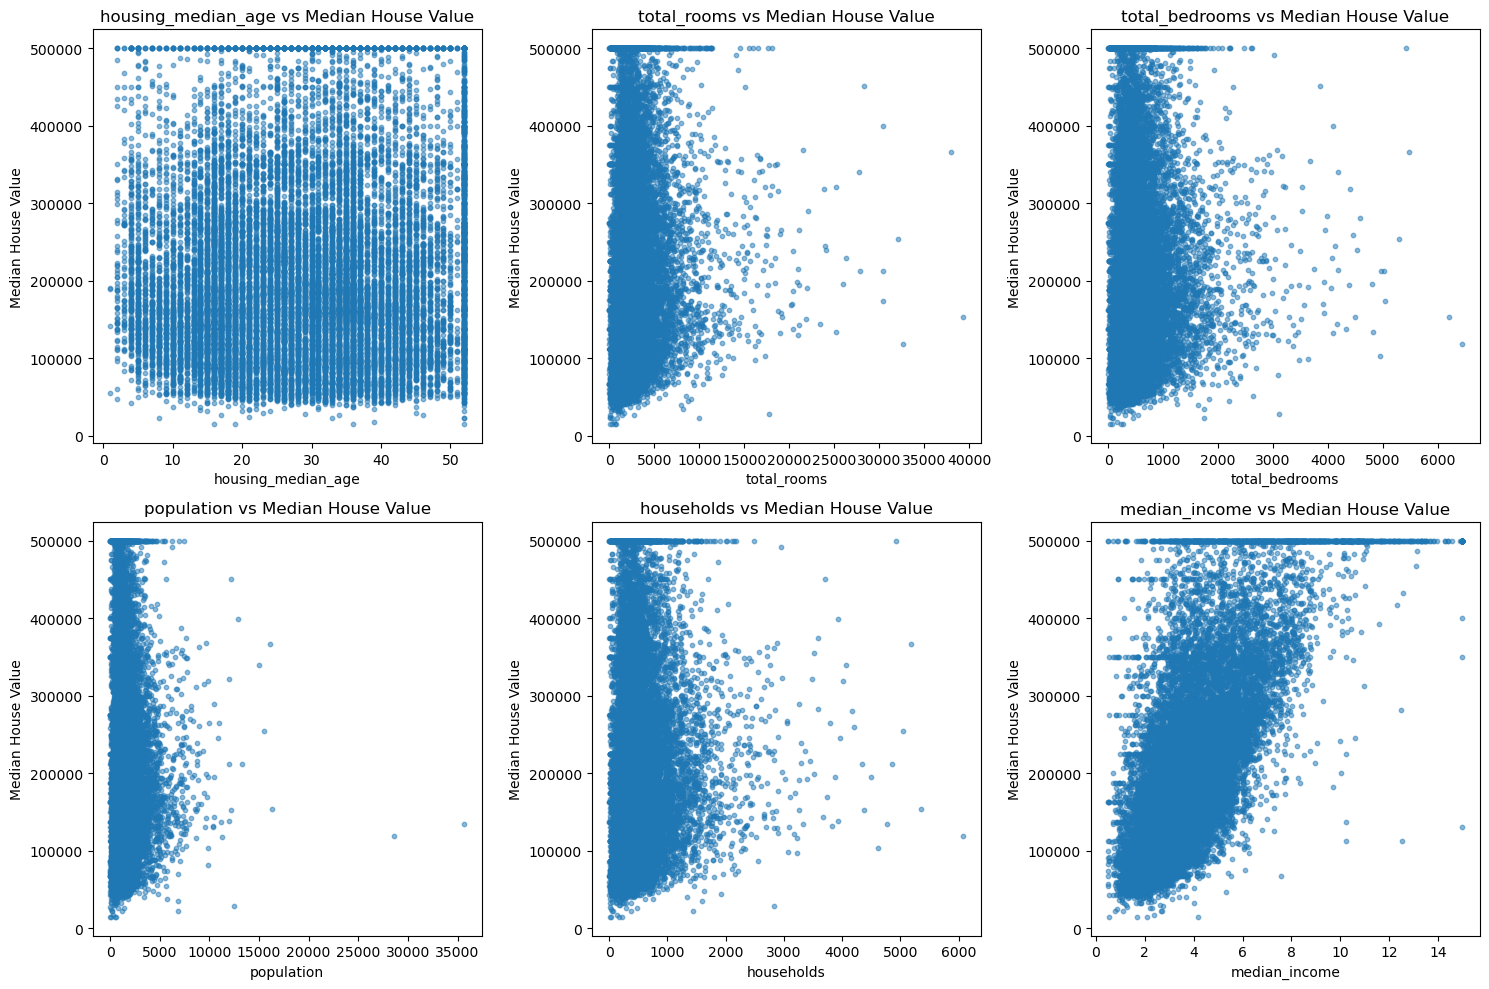

In [3]:
import matplotlib.pyplot as plt
# List of numerical features (excluding median_house_value)
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
            'population', 'households', 'median_income']

# Set up the plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df['median_house_value'], alpha=0.5, s=10)
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.title(f"{feature} vs Median House Value")

plt.tight_layout()
plt.show()

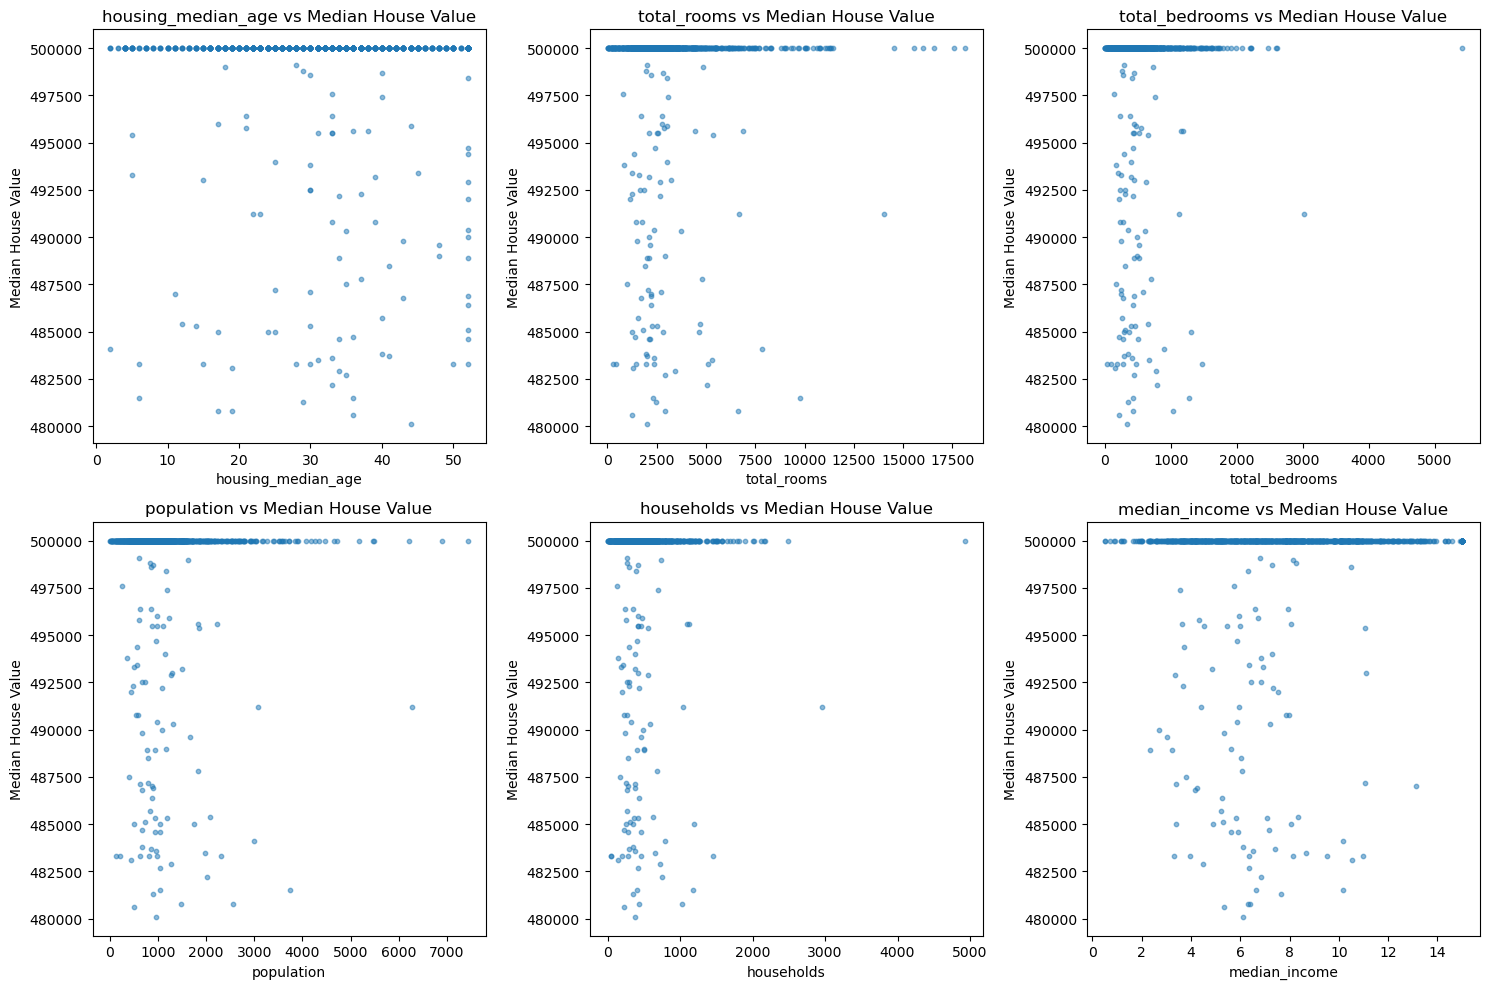

In [6]:
high_value_houses = df[df["median_house_value"] >= 480000]
# Set up the plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(high_value_houses[feature], high_value_houses['median_house_value'], alpha=0.5, s=10)
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.title(f"{feature} vs Median House Value")

plt.tight_layout()
plt.show()

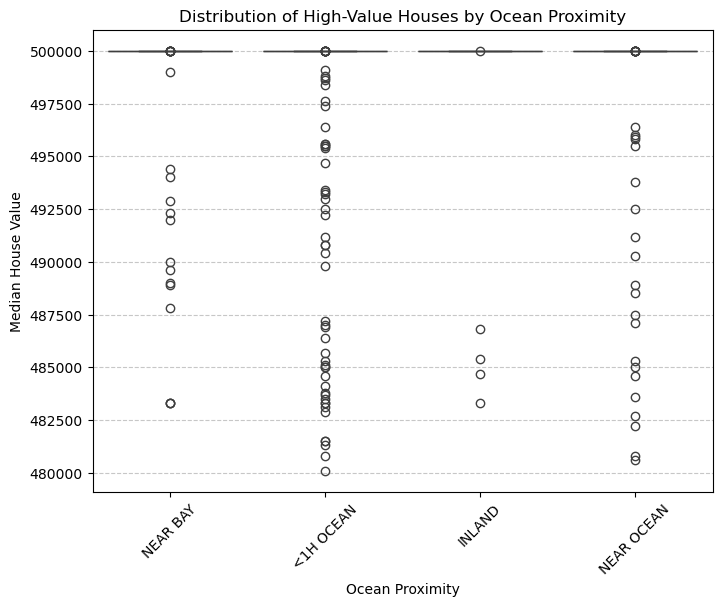

In [7]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=high_value_houses["ocean_proximity"], y=high_value_houses["median_house_value"])
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.title("Distribution of High-Value Houses by Ocean Proximity")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()